# прогнозирование аэродинамических коэффициентов аэродинамического профиля с использованием искусственной нейронной сети

В этом блокноте искусственная нейронная сеть моделируется для прогнозирования аэродинамических коэффициентов крылового профиля, который летит при номинальных условиях числа Маха M = 0,729, где данные изменения M и угла атаки α приводят к различным коэффициентам подъемной силы Cl, коэффициенту лобового сопротивления. Cd с использованием Tensorflow и Keras

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Импортируем данные

In [2]:
datafile = pd.read_csv('diplom_data1.csv').drop(columns = 'n')

In [3]:
datafile

,AoA,s,h_otn,cx,cy
0,0,0.495,999.90,0.016254,0.144729
1,0,0.990,1999.80,0.015947,0.210299
2,0,1.485,2999.70,0.015499,0.251017
3,0,1.980,3999.60,0.015006,0.278936
4,0,2.475,4999.50,0.014565,0.299458
...,...,...,...,...,...
175,10,2.475,3999.60,0.075937,0.991650
176,10,2.475,2999.70,0.075974,0.992389
177,10,2.475,1999.80,0.072602,1.006295
178,10,2.475,1499.85,0.070082,1.010094


### Визуализация данных

Построение данных для лучшей визуализации распределения и линейности данных.

#### Коэффициент подъемной силы Cl визуализация

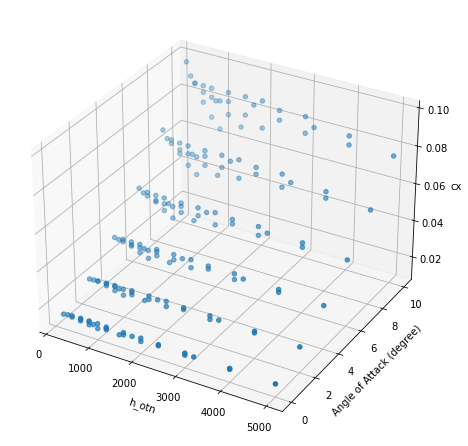

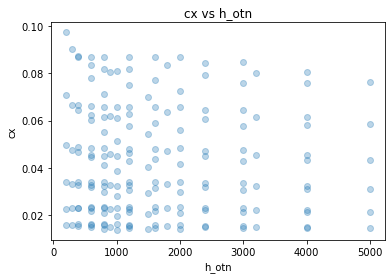

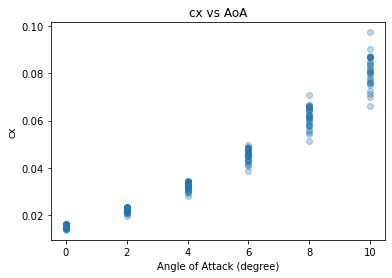

In [4]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(datafile['h_otn'], datafile['AoA'], datafile['cx'])
clplot.set_xlabel('h_otn')
clplot.set_ylabel('Angle of Attack (degree)')
clplot.set_zlabel('cx')
plt.show()

plt.scatter(datafile['h_otn'], datafile['cx'], alpha = 0.3)
plt.xlabel('h_otn')
plt.ylabel('cx')
plt.title('cx vs h_otn')
plt.show()

plt.scatter(datafile['AoA'], datafile['cx'], alpha = 0.3)
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('cx')
plt.title('cx vs AoA')
plt.show()

#### Коэффициент лобового спорпотивления Cd Визуализация

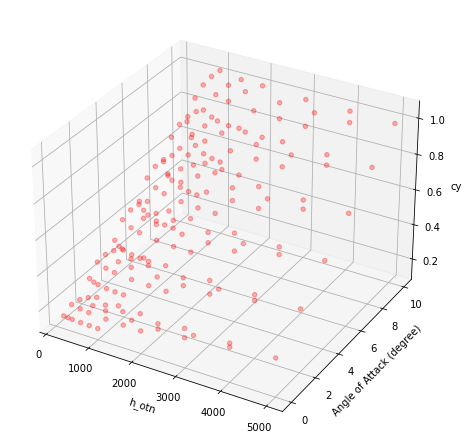

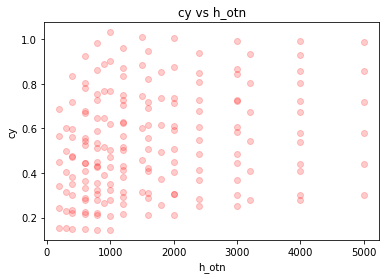

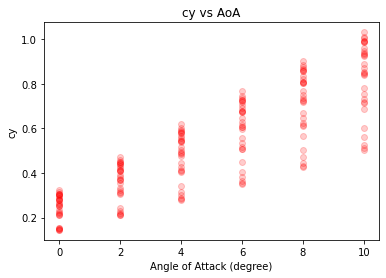

In [5]:
figcd = plt.figure(figsize = [6,6])
cdplot = Axes3D(figcd)
cdplot.scatter(datafile['h_otn'], datafile['AoA'], datafile['cy'], c = 'r', alpha = 0.3)
cdplot.set_xlabel('h_otn')
cdplot.set_ylabel('Angle of Attack (degree)')
cdplot.set_zlabel('cy')
plt.show()

plt.scatter(datafile['h_otn'], datafile['cy'], alpha = 0.2, c = 'r')
plt.xlabel('h_otn')
plt.ylabel('cy')
plt.title('cy vs h_otn')
plt.show()

plt.scatter(datafile['AoA'], datafile['cy'], alpha = 0.2, c = 'r')
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('cy')
plt.title('cy vs AoA')
plt.show()

### Корреляция

Проверка коэффициента корреляции Пирсона для измерения статистической взаимосвязи или ассоциации между переменными.

In [ ]:
df_heatmap = sns.heatmap(datafile.corr(), annot = True, cmap = 'coolwarm')

### Данные входа и вывода
Определение входных и выходных данных.

In [7]:
X = datafile.loc[:, ['h_otn', 'AoA','s']]
y = datafile.loc[:, ['cx', 'cy']]

In [8]:
X #Входные данные

,h_otn,AoA,s
0,999.90,0,0.495
1,1999.80,0,0.990
2,2999.70,0,1.485
3,3999.60,0,1.980
4,4999.50,0,2.475
...,...,...,...
175,3999.60,10,2.475
176,2999.70,10,2.475
177,1999.80,10,2.475
178,1499.85,10,2.475


In [9]:
y #Выходные данные

,cx,cy
0,0.016254,0.144729
1,0.015947,0.210299
2,0.015499,0.251017
3,0.015006,0.278936
4,0.014565,0.299458
...,...,...
175,0.075937,0.991650
176,0.075974,0.992389
177,0.072602,1.006295
178,0.070082,1.010094


In [10]:
k=[]
y_train2= np.array(y)

for i in range (len(y_train2)):
    if y_train2[i][0]!= 0 :
         k.append(y_train2[i][1]/y_train2[i][0])
    else:
        print("cx=0")
max_k=max(k)    
print (max_k)      
print (k.index(max(k))) 
print(y_train2[k.index(max(k))])

24.10034625385666
79
[0.01958471 0.47199835]


### Разделение датасета на тестовый и на обучающий


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

визуализация разделённых данных

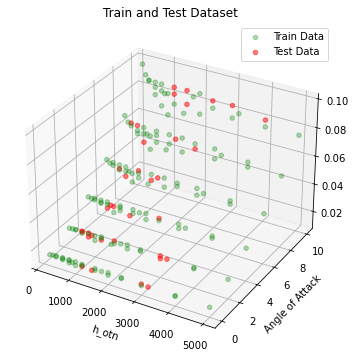

In [12]:
# Creating figure
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(X_train['h_otn'], X_train['AoA'], y_train['cx'], color = "green", alpha=0.3, label='Train Data')
visual_split.scatter3D(X_test['h_otn'], X_test['AoA'], y_test['cx'], color = "red",alpha=0.5, label='Test Data')
plt.title("Train and Test Dataset")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()


## Нормализация данных

Нормализация гарантирует, что величина значений, которые принимает функция, более или менее одинакова.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

## Моделирование нейросети


Функция активации для скрытого уровня сети использует функцию выпрямленных линейных единиц (ReLU), поскольку это простая, быстрая и наблюдаемая сходимость гораздо быстрее и надежнее.

Алгоритм исключения закомментирован, поскольку он не обеспечивает улучшений после нескольких тренировок, а вместо этого используется метод ранней остановки, чтобы избежать переобучения нашей нейронной сети для набора данных.

Оптимизатор - это оптимизатор адама, поскольку он обеспечивает адаптивную скорость обучения для лучшей оптимизации.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
NNmodel = Sequential()

NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 2,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

### Метод ранней остановки

Чтобы избежать переобучения при обучении нейронной сети, добавлен метод ранней остановки. Ранняя остановка - это форма регуляризации, используемая во избежание переобучения при обучении учащегося итеративным методам.

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

### Обучение

In [18]:
NNmodel.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 2s 58ms/step - loss: 0.2091 - val_loss: 0.2114
Epoch 2/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1948 - val_loss: 0.1982
Epoch 3/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1821 - val_loss: 0.1856
Epoch 4/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1695 - val_loss: 0.1733
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1575 - val_loss: 0.1614
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1455 - val_loss: 0.1500
Epoch 7/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1341 - val_loss: 0.1389
Epoch 8/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1234 - val_loss: 0.1280
Epoch 9/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1128 - val_loss: 0.1179
Epoch 10/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 0.1083
Epoch 11/1000
5/5 

Epoch 165/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 166/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 167/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 168/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 169/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 170/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 171/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 172/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 173/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 174/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0011


Epoch 318/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.6081e-04 - val_loss: 4.8275e-04
Epoch 319/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.6432e-04 - val_loss: 4.7674e-04
Epoch 320/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.5935e-04 - val_loss: 4.8970e-04
Epoch 321/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.5949e-04 - val_loss: 4.8430e-04
Epoch 322/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.7034e-04 - val_loss: 4.6667e-04
Epoch 323/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.5711e-04 - val_loss: 4.7412e-04
Epoch 324/1000
5/5 [==============================] - 0s 5ms/step - loss: 5.5528e-04 - val_loss: 4.9216e-04
Epoch 325/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.6080e-04 - val_loss: 4.7549e-04
Epoch 326/1000
5/5 [==============================] - 0s 6ms/step - loss: 5.5583e-04 - val_loss: 4.9112e-04
Epoch 327/1000
5/5 [========

Epoch 394/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9391e-04 - val_loss: 4.7123e-04
Epoch 395/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9157e-04 - val_loss: 4.4795e-04
Epoch 396/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9779e-04 - val_loss: 4.3787e-04
Epoch 397/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.8697e-04 - val_loss: 4.7682e-04
Epoch 398/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9351e-04 - val_loss: 4.7481e-04
Epoch 399/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.8899e-04 - val_loss: 4.3519e-04
Epoch 400/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9884e-04 - val_loss: 4.4606e-04
Epoch 401/1000
5/5 [==============================] - 0s 5ms/step - loss: 4.9835e-04 - val_loss: 4.8542e-04
Epoch 402/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.8876e-04 - val_loss: 4.2984e-04
Epoch 403/1000
5/5 [========

Epoch 470/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5670e-04 - val_loss: 4.0455e-04
Epoch 471/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5302e-04 - val_loss: 4.1262e-04
Epoch 472/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5234e-04 - val_loss: 4.1403e-04
Epoch 473/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5054e-04 - val_loss: 4.0449e-04
Epoch 474/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.4998e-04 - val_loss: 4.2144e-04
Epoch 475/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.5307e-04 - val_loss: 4.1428e-04
Epoch 476/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.4767e-04 - val_loss: 4.0214e-04
Epoch 477/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5181e-04 - val_loss: 4.0900e-04
Epoch 478/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.5323e-04 - val_loss: 3.9004e-04
Epoch 479/1000
5/5 [========

Epoch 546/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.1241e-04 - val_loss: 3.5316e-04
Epoch 547/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.0233e-04 - val_loss: 3.7013e-04
Epoch 548/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.0056e-04 - val_loss: 3.6149e-04
Epoch 549/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.0757e-04 - val_loss: 3.6062e-04
Epoch 550/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.2478e-04 - val_loss: 3.5360e-04
Epoch 551/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.0660e-04 - val_loss: 3.7382e-04
Epoch 552/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.9714e-04 - val_loss: 3.4582e-04
Epoch 553/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.9700e-04 - val_loss: 3.6846e-04
Epoch 554/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.0750e-04 - val_loss: 3.5866e-04
Epoch 555/1000
5/5 [========

Epoch 622/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5970e-04 - val_loss: 3.1919e-04
Epoch 623/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.6736e-04 - val_loss: 3.2950e-04
Epoch 624/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5962e-04 - val_loss: 3.3952e-04
Epoch 625/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5855e-04 - val_loss: 3.1858e-04
Epoch 626/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.6308e-04 - val_loss: 3.3161e-04
Epoch 627/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5921e-04 - val_loss: 3.1929e-04
Epoch 628/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.5846e-04 - val_loss: 3.2706e-04
Epoch 629/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5941e-04 - val_loss: 3.2294e-04
Epoch 630/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.5790e-04 - val_loss: 3.3788e-04
Epoch 631/1000
5/5 [========

### График потерь во время обучения

<AxesSubplot:>

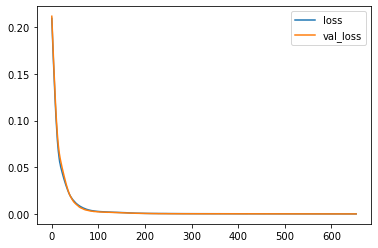

In [19]:
losses = pd.DataFrame(NNmodel.history.history)
losses[['loss', 'val_loss']].plot()

### Прогнозирование

In [20]:
predictions = NNmodel.predict(X_test)

### Среднеквадратичная ошибка и средняя абсолютная ошибка результатов прогноза

In [21]:
mse_cx = mean_squared_error(y_test[:,0], predictions[:,0])
print(f"Mean Squared Error for cx: {mse_cx}")
mae_cx = np.sum(np.absolute(y_test[:,0]- predictions[:,0]))/len(y_test)
print(f"Mean Absolute Error for cx: {mae_cx}\n")
mse_cy = mean_squared_error(y_test[:,1], predictions[:,1])
print(f"Mean Squared Error for cy: {mse_cy}")
mae_cy = np.sum(np.absolute(y_test[:,1]- predictions[:,1]))/len(y_test)
print(f"Mean Absolute Error for cy: {mae_cy}\n")
#mse_cp = mean_squared_error(y_test[:,2], predictions[:,2])
#print(f"Mean Squared Error for Cp: {mse_cp}")
#mae_cp = np.sum(np.absolute(y_test[:,2]- predictions[:,2]))/len(y_test)
#print(f"Mean Absolute Error for Cp: {mae_cp}\n")

Mean Squared Error for cx: 0.00020713500339732084
Mean Absolute Error for cx: 0.010806748114466164

Mean Squared Error for cy: 0.0004249150099576507
Mean Absolute Error for cy: 0.017898251519613148



In [22]:
predictions = scalery.inverse_transform(predictions)
y_test = scalery.inverse_transform(y_test)

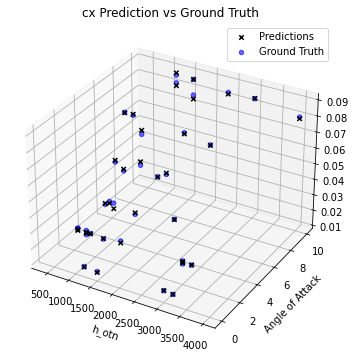

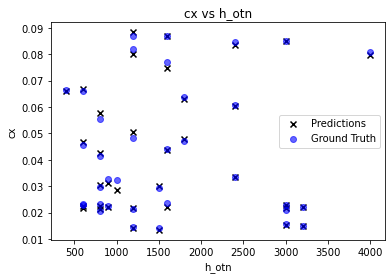

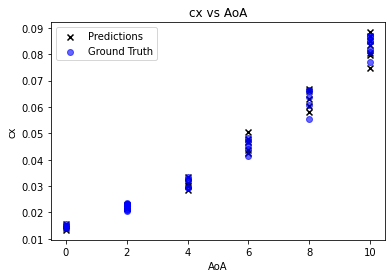

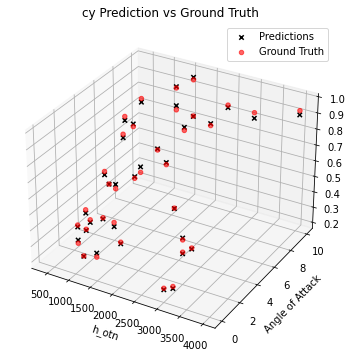

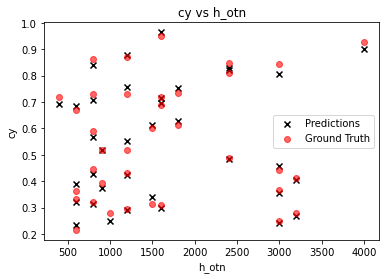

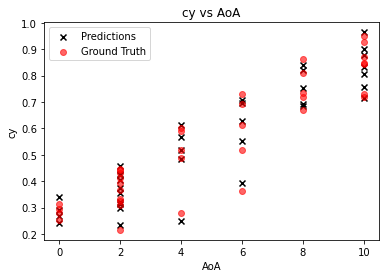

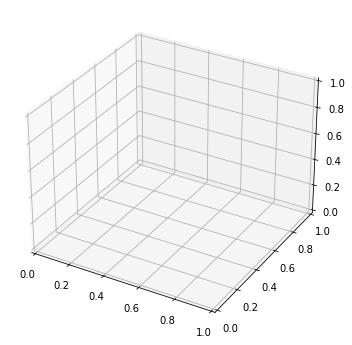

In [23]:
###############################Cl
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("cx Prediction vs Ground Truth")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('h_otn')
plt.ylabel('cx')
plt.title('cx vs h_otn')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('cx')
plt.title('cx vs AoA')
plt.legend()
plt.show()

##############################Cd
# Creating figure Cd
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.title("cy Prediction vs Ground Truth")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('h_otn')
plt.ylabel('cy')
plt.title('cy vs h_otn')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('cy')
plt.title('cy vs AoA')
plt.legend()
plt.show()

##############################Cp
# Creating figure Cp
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
#visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "g", alpha=0.6, label='Ground Truth')
#plt.title("Cp Prediction vs Ground Truth")
#plt.xlabel('Mach Number')
#plt.ylabel('Angle of Attack')
#plt.legend()
#plt.show()

#plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
#plt.xlabel('Mach Number')
#plt.ylabel('Cd')
#plt.title('Cd vs Mach Number')
#plt.legend()
#plt.show()

#plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
#plt.xlabel('AoA')
#plt.ylabel('Cd')
#plt.title('Cd vs AoA')
#plt.legend()
#plt.show()

### Предсказание vs Истинные значения Визуализация

### Выборка прогноза

In [24]:
sample_number = 12
#alldata=len(predictions)
print("[cx cy ]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {y_test[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(y_test[i]-predictions[i])
    print(f"error: {error}\n--------------------------------------------------")


[cx cy ]
Sample Data 1: [0.02971989 0.58989899]
Prediction 1: [0.03044352 0.56862646]
error: [0.00072363 0.02127253]
--------------------------------------------------
Sample Data 2: [0.02063838 0.4476108 ]
Prediction 2: [0.02151296 0.4264407 ]
error: [0.00087458 0.02117012]
--------------------------------------------------
Sample Data 3: [0.08688353 0.7294496 ]
Prediction 3: [0.08829056 0.756077  ]
error: [0.00140704 0.02662739]
--------------------------------------------------
Sample Data 4: [0.04556916 0.36286456]
Prediction 4: [0.04664525 0.39121246]
error: [0.00107609 0.0283479 ]
--------------------------------------------------
Sample Data 5: [0.02111116 0.44379138]
Prediction 5: [0.02165584 0.45585042]
error: [0.00054468 0.01205904]
--------------------------------------------------
Sample Data 6: [0.03355503 0.48748712]
Prediction 6: [0.03333044 0.48467478]
error: [0.00022459 0.00281233]
--------------------------------------------------
Sample Data 7: [0.04698523 0.61361369